In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
links = pd.read_csv('./data/ml-latest-small/links.csv')
movies = pd.read_csv('./data/ml-latest-small/movies.csv')
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
tags = pd.read_csv('./data/ml-latest-small/tags.csv')

In [4]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [5]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [6]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [7]:
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [8]:
len(ratings)

100836

In [9]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [10]:
len(tags)

3683

In [11]:
tags.nunique()

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64

In [12]:
movie = pd.merge(ratings, movies, on='movieId', how='inner')
movie.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [13]:
movie['genre'] = movie['genres'].str.split('|').str[0]
movie.head(2)

,userId,movieId,rating,timestamp,title,genres,genre
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,Comedy


Text(0, 0.5, 'Frequency')

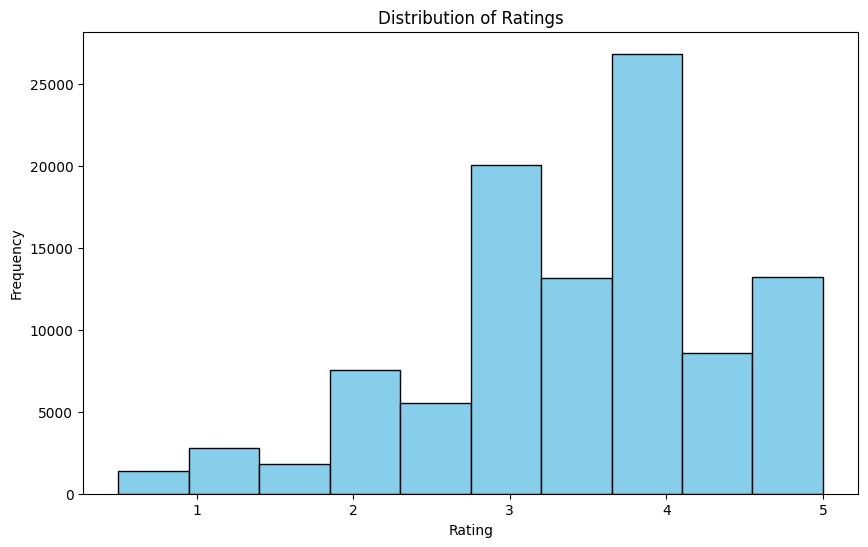

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(movie['rating'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

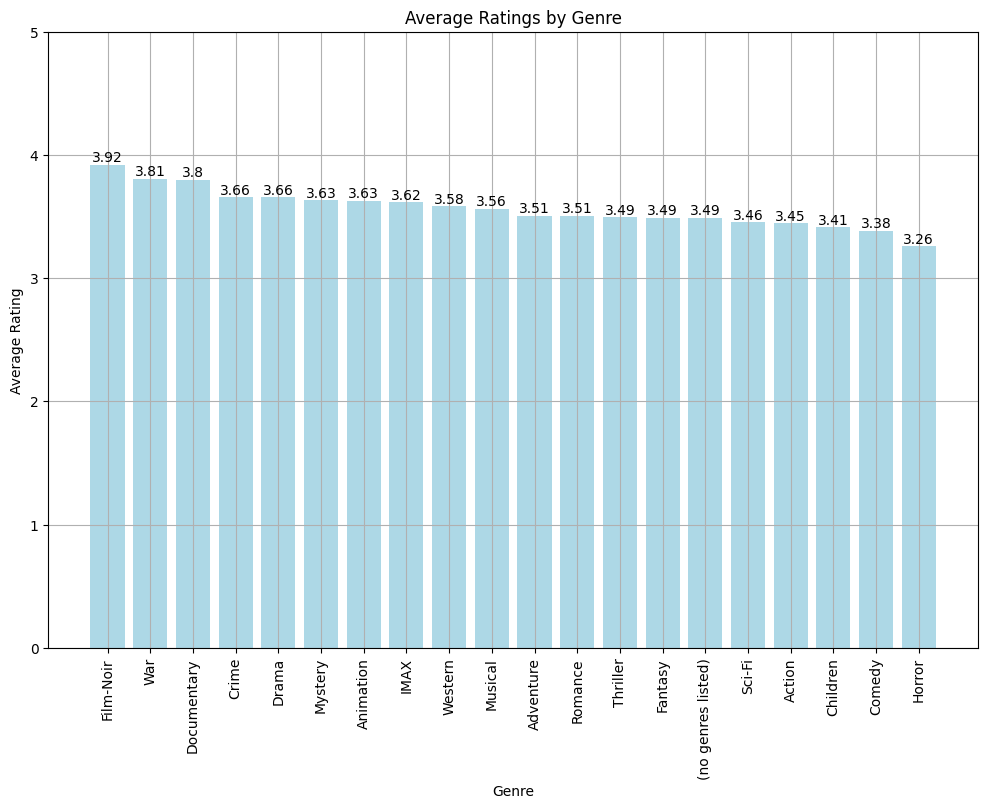

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# genres를 분리하여 새로운 행으로 확장
exploded_df = movie.assign(genre=movie['genres'].str.split('|')).explode('genre')

# 각 장르에 대한 평균 rating 계산
genre_rating_mean = exploded_df.groupby('genre')['rating'].mean().sort_values(ascending=False)

# 바 그래프 그리기
plt.figure(figsize=(12, 8))
bars = plt.bar(genre_rating_mean.index, genre_rating_mean, color='lightblue')

# 그래프 제목과 축 레이블 설정
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Rating scale is typically from 0 to 5
plt.grid(True)

# 바 위에 평균 rating 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 그래프 표시
plt.xticks(rotation=90)  # x축 라벨이 잘 보이도록 회전
plt.show()


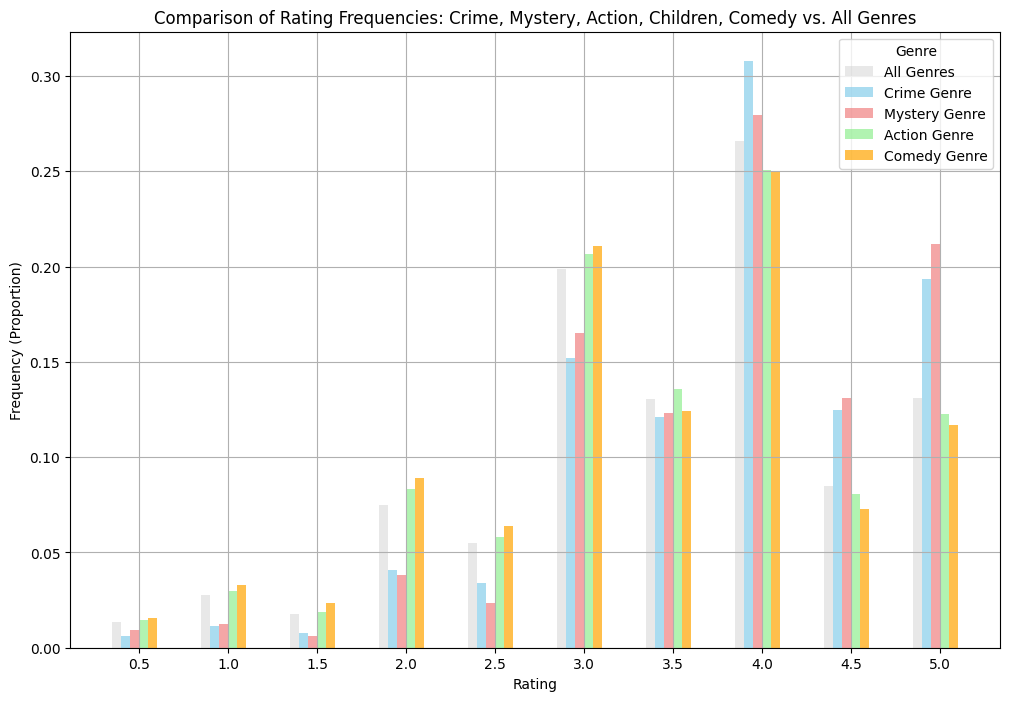

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 각 장르에 대한 빈도 계산
genres = ['Crime', 'Mystery', 'Action', 'Comedy']
genre_ratings_freq = {}

for genre in genres:
    genre_df = movie[movie['genre'] == genre]
    genre_ratings_count = genre_df['rating'].value_counts().sort_index()
    genre_ratings_freq[genre] = genre_ratings_count / genre_ratings_count.sum()

# 전체 ratings에 대한 빈도 계산
all_ratings_count = movie['rating'].value_counts().sort_index()
all_ratings_freq = all_ratings_count / all_ratings_count.sum()

# 막대 너비 설정
bar_width = 0.1

# x축 위치 설정
ratings = all_ratings_count.index
index = np.arange(len(ratings))

plt.figure(figsize=(12, 8))

# 전체 빈도의 평균을 막대 그래프로 그리기
plt.bar(index, all_ratings_freq, width=bar_width, alpha=0.5, label='All Genres', color='lightgray')

# 각 장르의 빈도 비율을 막대 그래프로 그리기
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple']
for i, genre in enumerate(genres):
    plt.bar(index + (i + 1) * bar_width, genre_ratings_freq[genre].reindex(ratings, fill_value=0), 
            width=bar_width, alpha=0.7, label=f'{genre} Genre', color=colors[i])

# 그래프 제목과 축 레이블 설정
plt.title('Comparison of Rating Frequencies: Crime, Mystery, Action, Children, Comedy vs. All Genres')
plt.xlabel('Rating')
plt.ylabel('Frequency (Proportion)')
plt.xticks(index + 2.5 * bar_width, ratings)
plt.legend(title='Genre')
plt.grid(True)
plt.show()


/var/folders/zs/nhxg8dr522z1hvsl9b42pyd40000gn/T/ipykernel_61581/2646097619.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data.fillna(0, inplace=True)


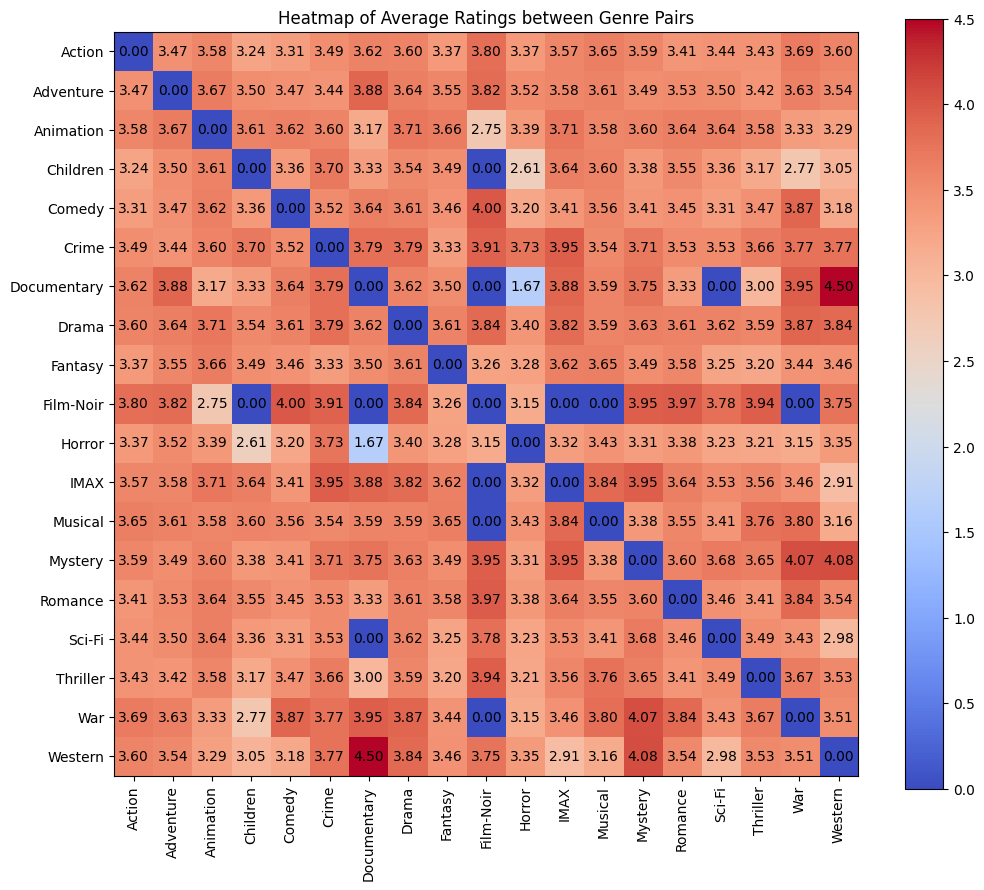

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# 장르 쌍을 계산하여 평균 rating 계산
genre_pairs = {}
for _, row in movie.iterrows():
    genres = row['genres'].split('|')
    rating = row['rating']
    for pair in combinations(genres, 2):
        if pair in genre_pairs:
            genre_pairs[pair].append(rating)
        else:
            genre_pairs[pair] = [rating]

# 각 장르 쌍의 평균 rating 계산
genre_pairs_avg_rating = {pair: sum(ratings)/len(ratings) for pair, ratings in genre_pairs.items()}

# 장르 목록 추출
all_genres = sorted(set([genre for pair in genre_pairs_avg_rating.keys() for genre in pair]))

# 빈 데이터프레임 생성
heatmap_data = pd.DataFrame(index=all_genres, columns=all_genres)

# 데이터프레임에 평균 rating 채우기
for pair, avg_rating in genre_pairs_avg_rating.items():
    heatmap_data.at[pair[0], pair[1]] = avg_rating
    heatmap_data.at[pair[1], pair[0]] = avg_rating  # 대칭이므로 반대쪽도 동일하게 채움

# 결측값을 0으로 채움 (혹은 다른 값으로 대체할 수 있음)
heatmap_data.fillna(0, inplace=True)

# Matplotlib으로 히트맵 그리기
plt.figure(figsize=(12, 10))
plt.imshow(heatmap_data, cmap='coolwarm', interpolation='nearest')

# X, Y축 라벨 설정
plt.xticks(ticks=np.arange(len(all_genres)), labels=all_genres, rotation=90)
plt.yticks(ticks=np.arange(len(all_genres)), labels=all_genres)

# 컬러바 추가
plt.colorbar()

# 각 셀에 평균 rating 값 표시
for i in range(len(all_genres)):
    for j in range(len(all_genres)):
        plt.text(j, i, f"{heatmap_data.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Heatmap of Average Ratings between Genre Pairs')
plt.show()

## 년도별 영화 트렌드

In [36]:
movie.head()

,userId,movieId,rating,timestamp,title,genre
0,1,1,4.0,964982703,Toy Story (1995),Adventure
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy
2,1,6,4.0,964982224,Heat (1995),Action
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime


In [21]:
# Function to extract the year from the title
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return int(match.group(1))
    return None

# Assuming your DataFrame is named movie
movie['year'] = movie['title'].apply(extract_year)
movie.head(2)

,userId,movieId,rating,timestamp,title,genres,genre,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,1995.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,Comedy,1995.0


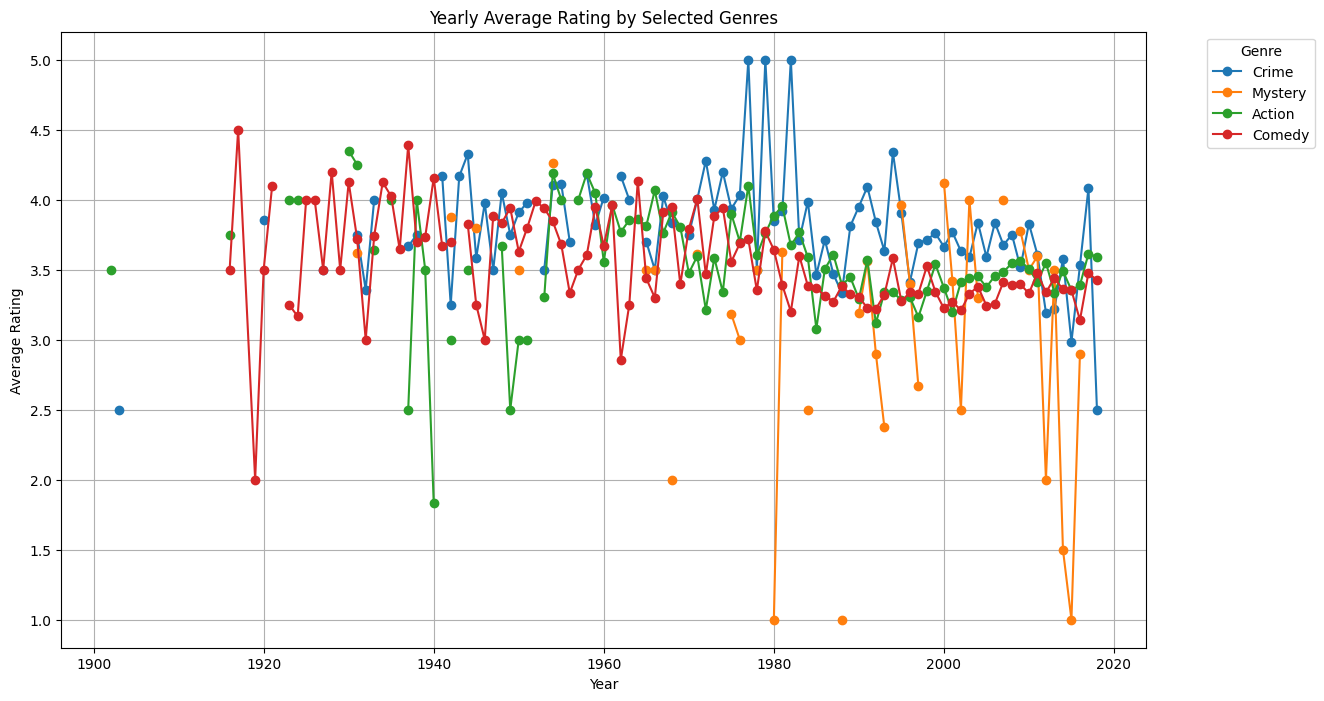

In [22]:
# 선택된 장르만 필터링
selected_genres = ['Crime', 'Mystery', 'Action', 'Comedy']
genre_yearly_avg = movie.groupby(['year', 'genre'])['rating'].mean().unstack()

# 선택된 장르만 필터링
genre_yearly_avg_filtered = genre_yearly_avg[selected_genres]

# 필터된 장르들에 대한 그래프 그리기
plt.figure(figsize=(14, 8))
for genre in genre_yearly_avg_filtered.columns:
    plt.plot(genre_yearly_avg_filtered.index, genre_yearly_avg_filtered[genre], marker='o', label=genre)

plt.title('Yearly Average Rating by Selected Genres')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


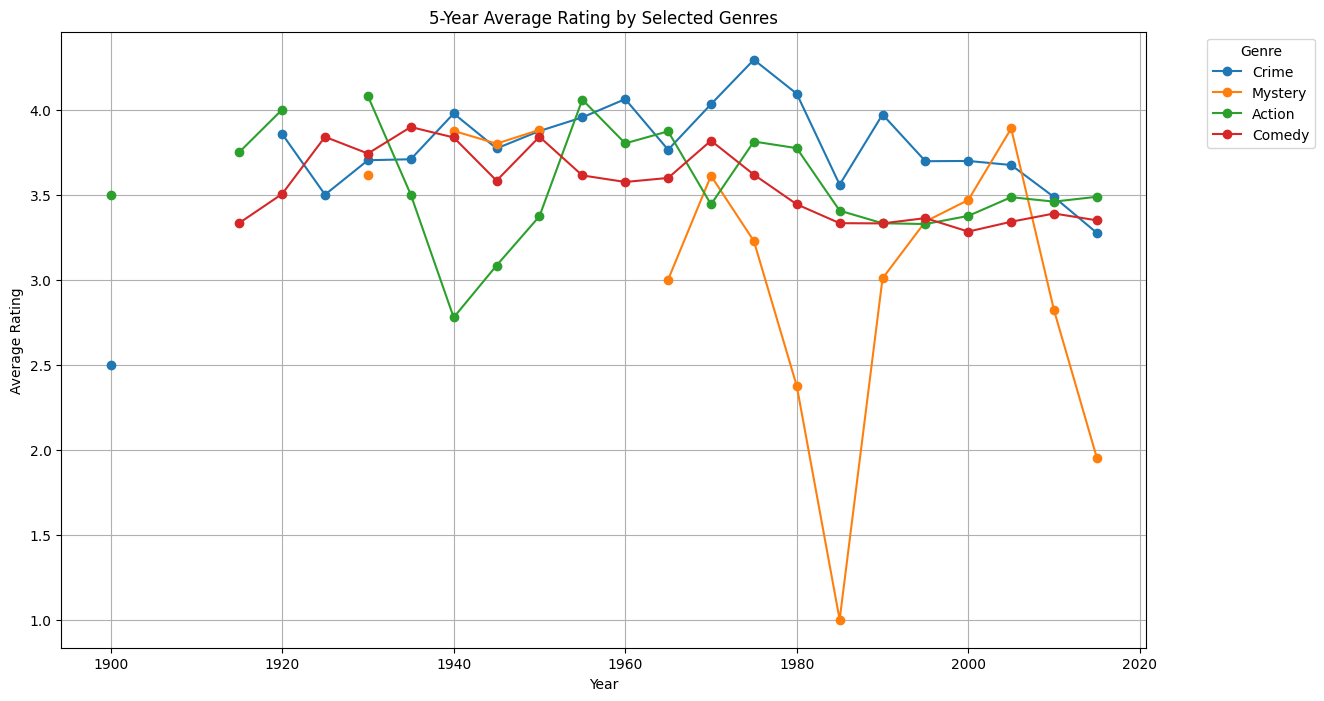

In [23]:
import matplotlib.pyplot as plt

# 선택된 장르만 필터링
selected_genres = ['Crime', 'Mystery', 'Action', 'Comedy']
genre_yearly_avg = movie.groupby(['year', 'genre'])['rating'].mean().unstack()

# 선택된 장르만 필터링
genre_yearly_avg_filtered = genre_yearly_avg[selected_genres]

# 5년 단위로 데이터 그룹화
genre_5year_avg = genre_yearly_avg_filtered.groupby((genre_yearly_avg_filtered.index // 5) * 5).mean()

# 필터된 장르들에 대한 그래프 그리기
plt.figure(figsize=(14, 8))
for genre in genre_5year_avg.columns:
    plt.plot(genre_5year_avg.index, genre_5year_avg[genre], marker='o', label=genre)

plt.title('5-Year Average Rating by Selected Genres')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
test = [1, 2, 'a', 'b']